<a href="https://colab.research.google.com/github/Sharad-t/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - **Unsupervised**
##### **Contribution**    - **Individual**
##### **Team Member**     - **Sharad Tiwari**

# **Project Summary -**

# **GitHub Link -**

**https://github.com/Sharad-t/Netflix-Movies-and-TV-Shows-Clustering**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
# Import Libraries

# Pandas for data manipulation
import pandas as pd

# Numerical python for dealing with maths or arrays
import numpy as np

# from matplotlib pyplot for data visualization
import matplotlib.pyplot as plt

# Seaborn  for data visualization
import seaborn as sns

# KMeans Algorithm for Clustering
from sklearn.cluster import KMeans

# DBSCAN Algorithm for Clustering
from sklearn.cluster import DBSCAN

# Library for Finding out the Silhoutte Score
from sklearn.metrics import silhouette_score

# Date-Time for Converting Date and Time
from datetime import datetime as dt


# Warnings for Ignoring Waring Messages
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Load Dataset
df= pd.read_csv('/content/drive/MyDrive/Capstone Projects/{Capstone Project -4 } (ML Clustering) Netflix_Movies_and_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
# df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")


### Dataset First View

In [16]:
# Dataset First Look
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [17]:
# Dataset Rows & Columns count

print('The Total Count of Rows and Columns in the dataset are :-',
      df.shape, ('(Rows , Columns)'))


The Total Count of Rows and Columns in the dataset are :- (7787, 12) (Rows , Columns)


### Dataset Information

In [18]:
# Dataset Info

print('Some of the Basic Information about the Data set like data type, Total count and Column Names are :-\n')

df.info()


Some of the Basic Information about the Data set like data type, Total count and Column Names are :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count

print('This Data has 0 Duplicate Values\n')

df[df.duplicated()]


This Data has 0 Duplicate Values



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count

print(df.isna().sum())

# Finding out Missing Values by Using List Comprehension

missing = [features for features in df.columns if df[features].isna().sum() > 0]

print(f"\n{missing} are the feature which is having missing Values ")


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

['director', 'cast', 'country', 'date_added', 'rating'] are the feature which is having missing Values 


the Missing Values are:- 3631 in total as we can see them properly in heatmap 



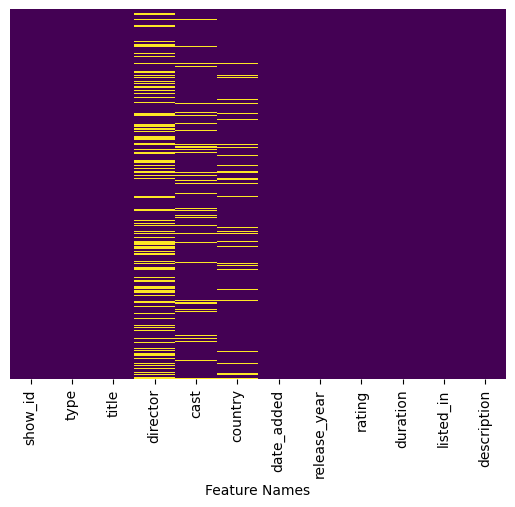

In [21]:
# Visualizing the missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Feature Names')

print(
    f'the Missing Values are:- {df.isna().sum().sum()} in total as we can see them properly in heatmap \n')


### What did you know about your dataset?

**The Dataset has Several Missing and NaN Value with which we have to deal**

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns

print('The Name of Features are :-\n', df.columns)


The Name of Features are :-
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [23]:
# Dataset Describe

print('Describe Method Gives us the 5 Number Summary about the Dataset Numercial Features \n here is the Small Description of dataset\n')

df.describe(include='all')


Describe Method Gives us the 5 Number Summary about the Dataset Numercial Features 
 here is the Small Description of dataset



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast** : Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration** : Total Duration - in minutes or number of seasons

* **listed_in** : Genere

* **description**: The Summary description

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.

print(
    f'the number of Unique Values in Each Variables are as Follows:-\n {df.nunique()}')


the number of Unique Values in Each Variables are as Follows:-
 show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.

# Imputing No Cast to Cast Feature where we had Null Values
df['cast'].fillna(value='No cast', inplace=True)

# Imputing Mode of the Country feature where we had Null Values
df['country'].fillna(value=df['country'].mode()[0], inplace=True)

# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)


### What all manipulations have you done and insights you found?

* Imputed Mode of the Country Feature at the Place of Null Values
* Imputed No Cast in Cast Feature at the Place of Null Values


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

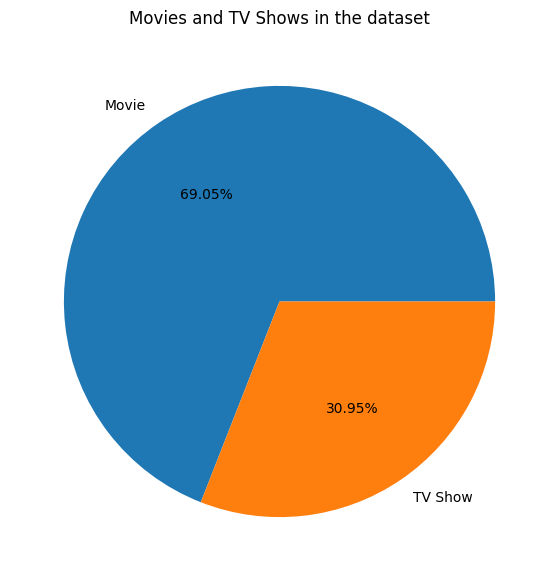

In [26]:
# Chart - 1 visualization code

plt.figure(figsize=(7, 7))
df.type.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')


##### 1. Why did you pick the specific chart?

**Pie Chart are those type of charts which can reperesent the Percentage Division Properly.**

##### 2. What is/are the insight(s) found from the chart?

**After using the Pie Chart We got to know that out of there are more than 69% are from Movies Type and 31% are from TV Shows Type. Means There are More Movies than TV shows on Netflix**

#### Chart - 2

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

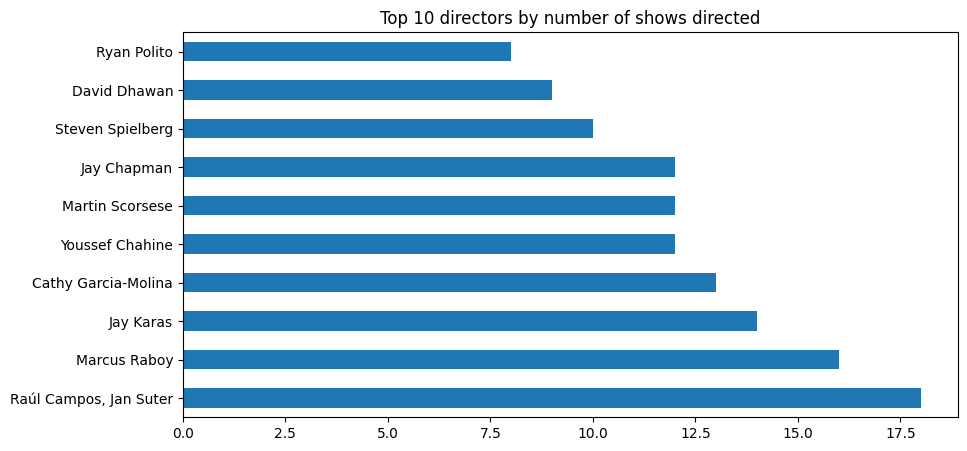

In [27]:
# Chart - 2 visualization code

plt.figure(figsize=(10, 5))
df[~(df['director'] == 'Unknown')].director.value_counts().nlargest(
    10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')


##### 1. Why did you pick the specific chart?

**Bar charts are very useful in presenting the numbers. as the above chart is clearly presenting that raul campos and jan suter have directed the maximum number of movies or TV Shows.**

##### 2. What is/are the insight(s) found from the chart?

**Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

#### Chart - 3

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

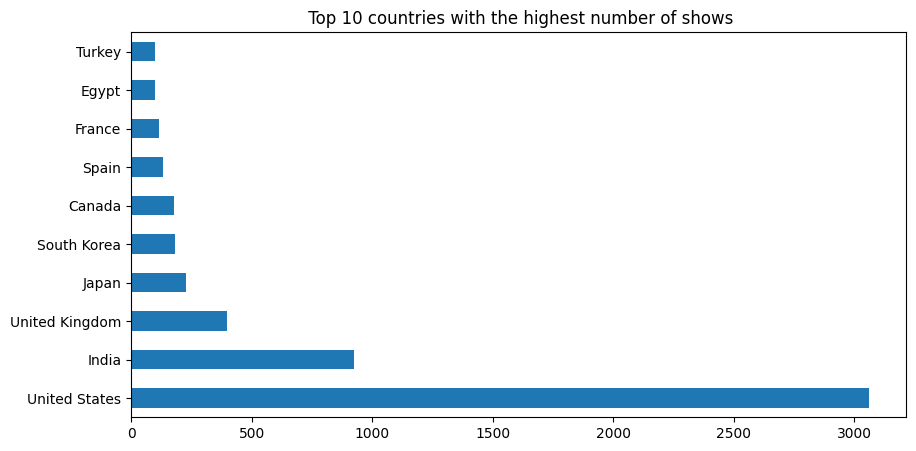

In [28]:
# Chart - 3 visualization code

plt.figure(figsize=(10, 5))
df[~(df['country'] == 'Unknown')].country.value_counts().nlargest(
    10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')


##### 1. Why did you pick the specific chart?

Bar Charts are used for representing the Number Efficiently. Thats why i have used the Bar chart.

##### 2. What is/are the insight(s) found from the chart?

* **The highest number of movies / TV shows were based out of the US, followed by India and UK.**

#### Chart - 4

Text(0.5, 1.0, 'Top 10 genres')

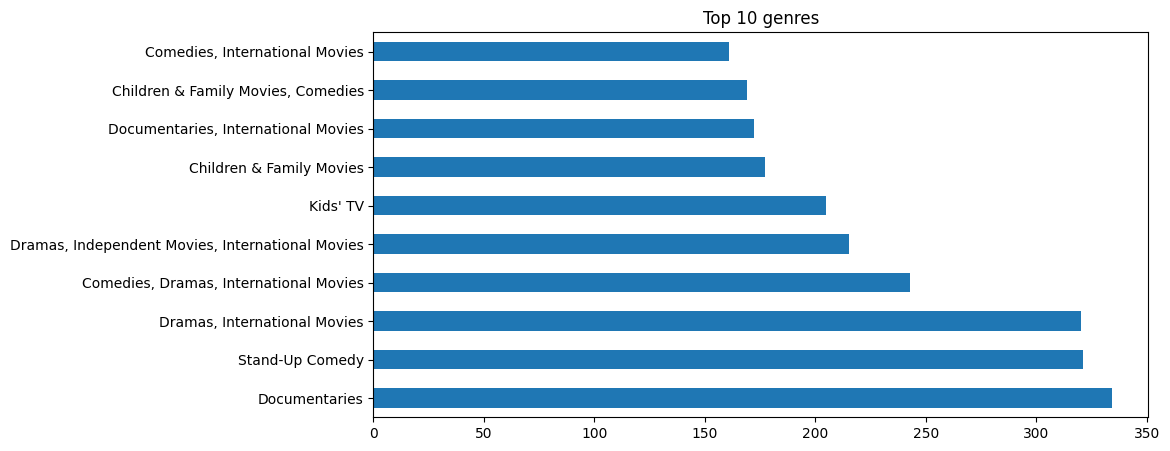

In [29]:
# Chart - 4 visualization code

plt.figure(figsize=(10, 5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')


##### 1. Why did you pick the specific chart?

**Here i am using the number of Genres so for representing the Number the Bar Charts are one of the Best Charts.**

##### 2. What is/are the insight(s) found from the chart?

* **The Documentaries is the most popular genre followed by comedies and Drama.**
* **These three genres account for about 41% of all movies and TV shows.**
* **This value increases to about 82% for top 10 genres.**

#### Chart - 5

Text(0.5, 1.0, 'distribution by released year')

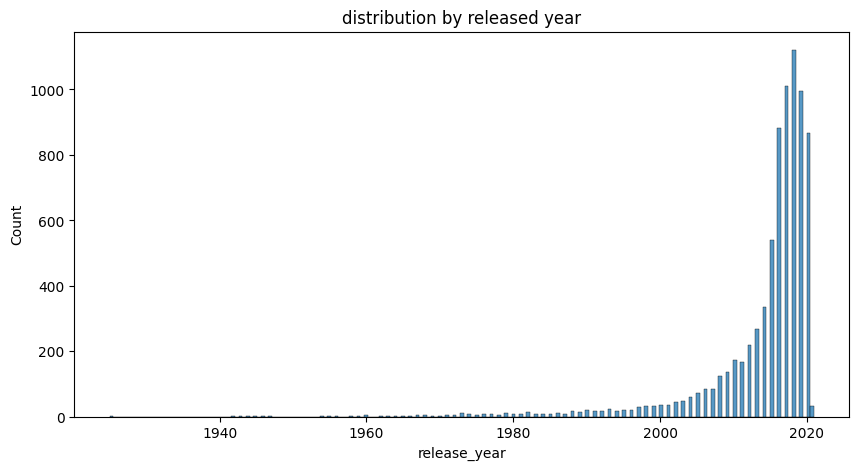

In [30]:
# Chart - 5 visualization code

plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')


##### 1. Why did you pick the specific chart?

**Histogram is the Chart which is used for getting the understanding about the Distribution of data, and here our motive is to check the Distribution of Release year of Movies. Thats why i have used Histogram**

##### 2. What is/are the insight(s) found from the chart?

**Netflix has greater number of new movies / TV shows than the old ones.**

#### Chart - 6

Text(0, 0.5, 'Months')

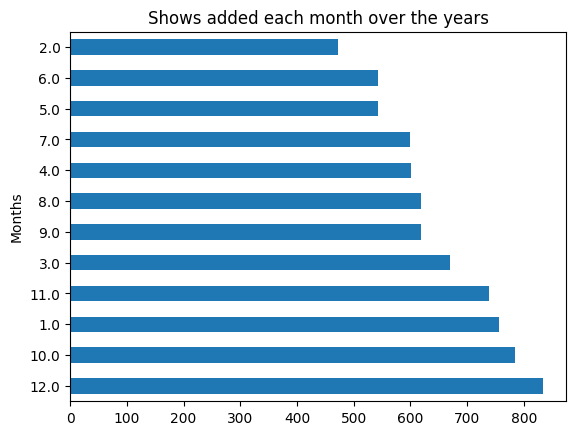

In [31]:
# Chart - 6 visualization code

df['month_added'].value_counts().astype(int).plot(kind='barh')
plt.title('Shows added each month over the years')
plt.ylabel('Months')


##### 1. Why did you pick the specific chart?

**Here the Aim is to find out how many Shows or Movies got Added Over the Years, And for that Reason we have used Horizontal Bar Chart. **

##### 2. What is/are the insight(s) found from the chart?

 **Over the years a greater number of shows were added in the months of October, November, December, and January.**

#### Chart - 7

Text(0.5, 0, '')

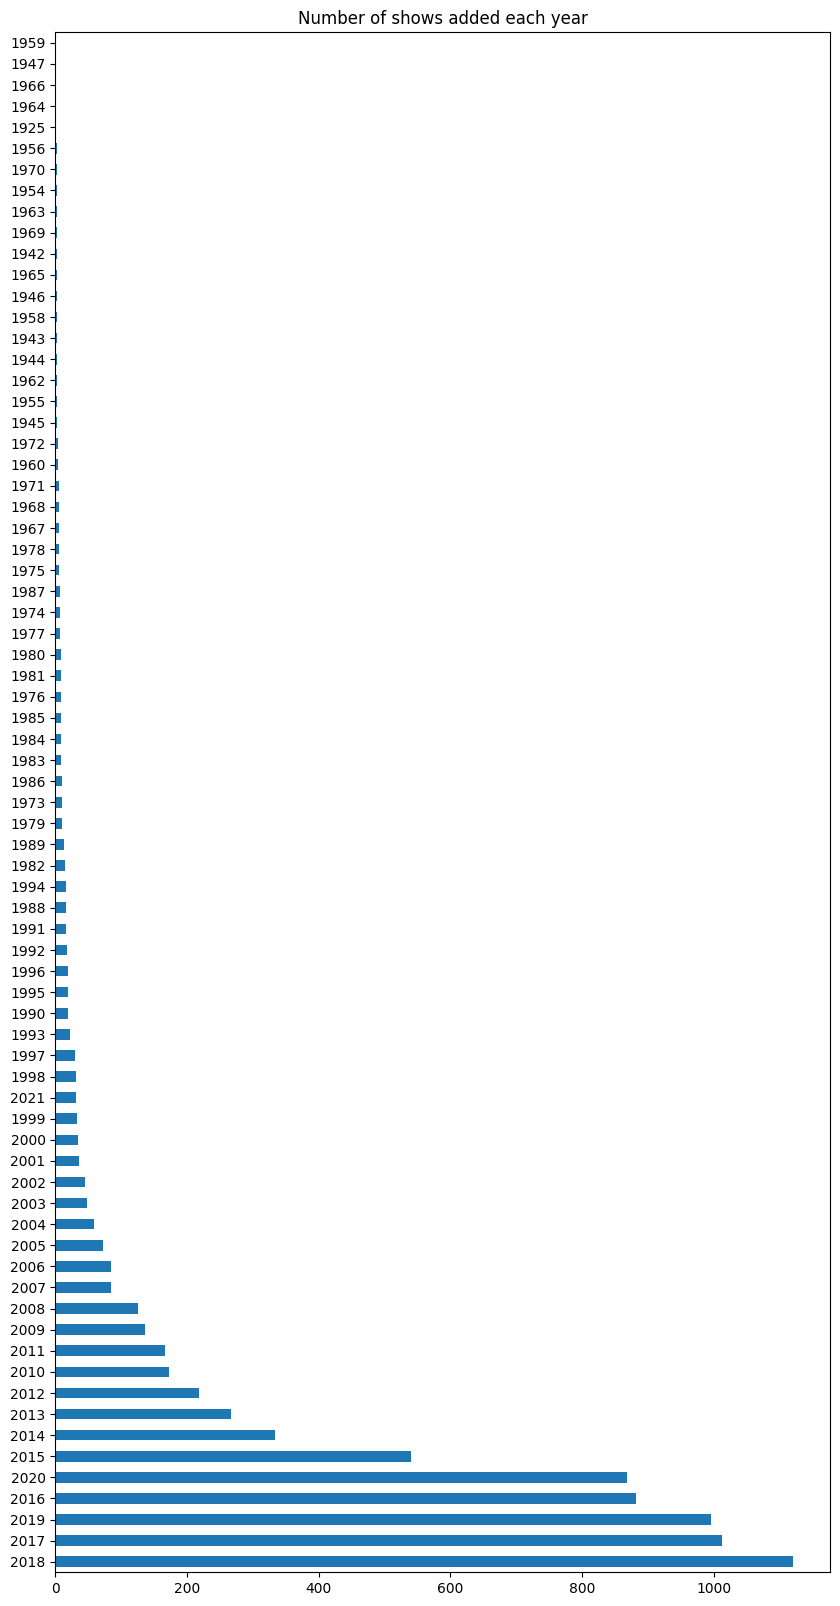

In [32]:
# Chart - 7 visualization code

plt.figure(figsize=(10, 20))
df['release_year'].value_counts().plot(kind='barh',)
plt.title('Number of shows added each year')
plt.xlabel('')


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* **Netflix continuous to add more shows on its platform over the years.**
* **There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.**
* **We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.**

#### Chart - 8

In [33]:
# Changing the values in the rating column

rating_map = {'TV-MA': 'Adults',
              'R': 'Adults',
              'PG-13': 'Teens',
              'TV-14': 'Young Adults',
              'TV-PG': 'Older Kids',
              'NR': 'Adults',
              'TV-G': 'Kids',
              'TV-Y': 'Kids',
              'TV-Y7': 'Older Kids',
              'PG': 'Older Kids',
              'G': 'Kids',
              'NC-17': 'Adults',
              'TV-Y7-FV': 'Older Kids',
              'UR': 'Adults'}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()


array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

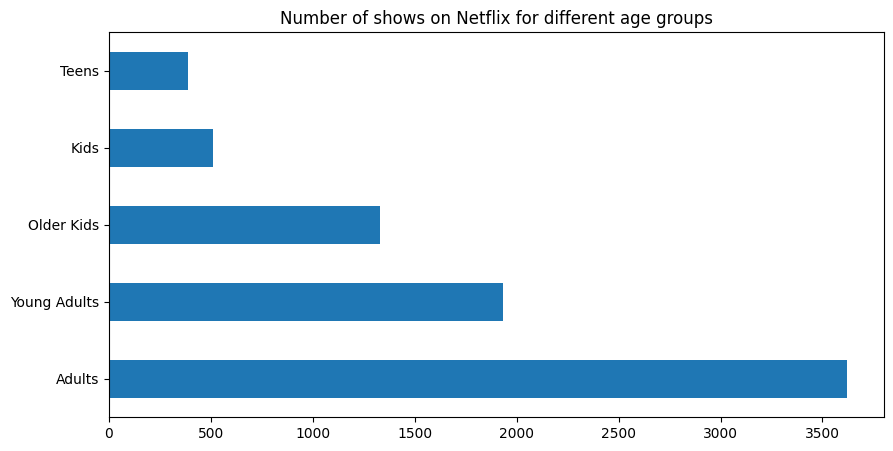

In [34]:
# Chart - 8 visualization code

plt.figure(figsize=(10, 5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')


##### 1. Why did you pick the specific chart?

**A bar chart shows the frequency of each data category.**

##### 2. What is/are the insight(s) found from the chart?

* **The majority of the shows on Netflix are catered to the needs of adult and young adult population.**

#### Chart - 9

In [35]:
# Chart - 9 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [36]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [37]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [38]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [39]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

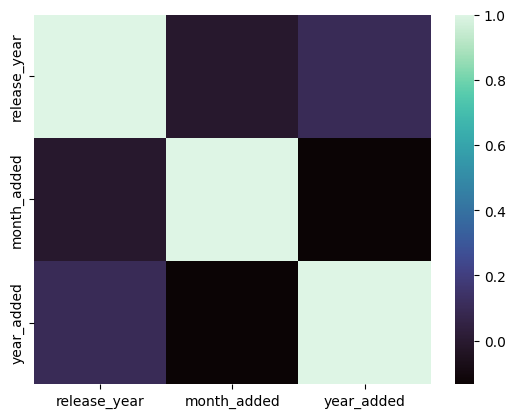

In [40]:
# Correlation Heatmap visualization code
corelation = df.corr()
sns.heatmap(corelation, cmap='mako')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

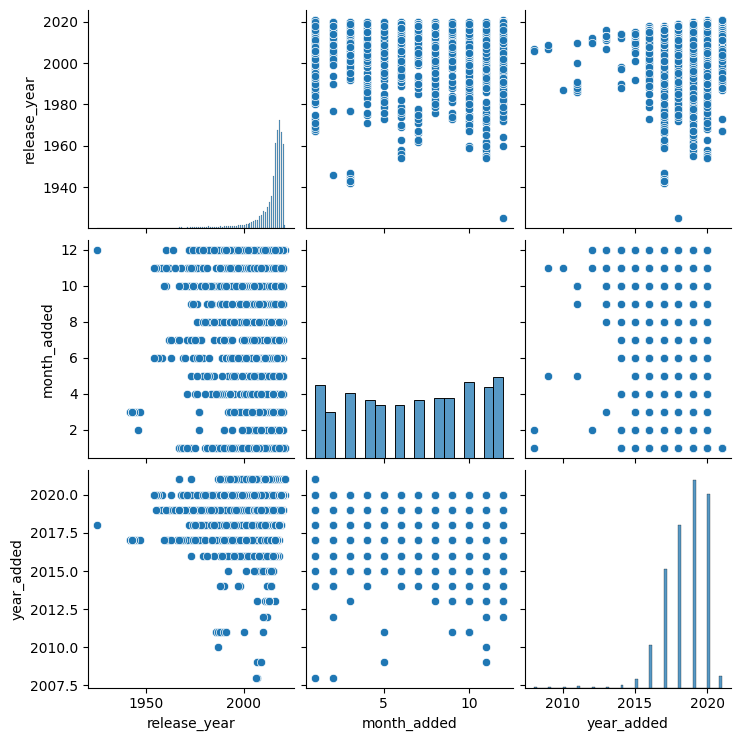

In [41]:
# Pair Plot visualization code
sns.pairplot(df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction


#### 2. Lower Casing

In [49]:
# Lower Casing


#### 3. Removing Punctuations

In [50]:
# Remove Punctuations


#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits


#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords


In [53]:
# Remove White spaces


#### 6. Rephrase Text

In [54]:
# Rephrase Text


#### 7. Tokenization

In [55]:
# Tokenization


#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging


#### 10. Text Vectorization

In [58]:
# Vectorizing Text


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data


### 6. Data Scaling

In [62]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***